# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import  make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.5f}'.format

# Import data

In [3]:
dataset = pd.read_csv('data/Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00000,1,1,1,101348.88000,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86000,1,0,1,112542.58000,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80000,3,1,0,113931.57000,1
3,4,15701354,Boni,699,France,Female,39,1,0.00000,2,0,0,93826.63000,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82000,1,1,1,79084.10000,0


# Data preparation

## Split independent and dependent data

In [5]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

## Encoders - Categorical to numerical

In [6]:
# Variable Geography
labelEncoder_x_1 = LabelEncoder()
X[:,1] = labelEncoder_x_1.fit_transform(X[:,1])

# Variable Gender
labelEncoder_x_2 = LabelEncoder()
X[:,2] = labelEncoder_x_1.fit_transform(X[:,2])

# Creating dummy variables for Gography values
oneHotEncoder = make_column_transformer((OneHotEncoder(categories = 'auto', sparse = False), [1]), remainder = 'passthrough')
X = oneHotEncoder.fit_transform(X)

#Resolving problem with multicollinearity of dummies variables excluding one collumn from dummies variables created for the feature Geography.
# https://www.algosome.com/articles/dummy-variable-trap-regression.html
X = X[:, 1:]


## Separating training and testing data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature scaling

In [8]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.fit_transform(X_test)

# Modeling neural network

## Creating model

In [12]:
classifier = Sequential()

# Creating layers

# Dense layer, with 6 neurons, with uniform initialization and 6 neurons in the input layer

'''Is possible to use the mean between the number of neurons 
in the input layer with the number of neurons in then output
layer to configure the number of neurons in the hidden layers.
This is one way to configure the quantity of neurons in the 
hiddens layers.'''

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## Compiling model

In [13]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training model

In [14]:
%%time
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
800/800 [==============================] - 5s 5ms/step - loss: 0.4801 - accuracy: 0.7945
Epoch 2/100
800/800 [==============================] - 4s 4ms/step - loss: 0.4309 - accuracy: 0.7945
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4240 - accuracy: 0.8021
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4196 - accuracy: 0.8255
Epoch 5/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4180 - accuracy: 0.8264
Epoch 6/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4158 - accuracy: 0.8311
Epoch 7/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4141 - accuracy: 0.8320
Epoch 8/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4130 - accuracy: 0.8320
Epoch 9/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4121 - accuracy: 0.8330
Epoch 10/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4109 - accura

# Evaluating the model

In [15]:
y_pred = classifier.predict(X_test)

63/63 [==============================] - 1s 3ms/step


## Apply threshold

In [16]:
y_pred = (y_pred > 0.5)

## Confusion matrix

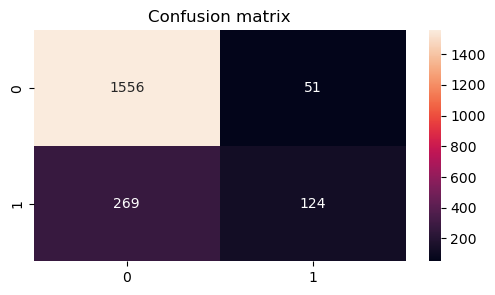

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6,3))
plt.title('Confusion matrix')
cfm_plot = sn.heatmap(cm, annot=True, fmt='g')
plt.show()
cfm_plot.figure.savefig("cfm-10-neurons.png")